## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')

df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [5]:
df.converted.value_counts()

0    259241
1     35237
Name: converted, dtype: int64

In [6]:
df.groupby('converted')['user_id'].nunique()

converted
0    256275
1     35173
Name: user_id, dtype: int64

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
df.query("(group == 'treatment' & landing_page != 'new_page') |(group != 'treatment' & landing_page == 'new_page') ").count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2 = df.query("(group == 'treatment' & landing_page == 'new_page') |(group == 'control' & landing_page == 'old_page') ")

In [10]:
df2.shape

(290585, 5)

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df3 = df2[df2.duplicated(['user_id'])]
print(df3)

      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


c. What is the row information for the repeat **user_id**? 

In [14]:
df4 = df2.query("user_id == 773192")

df4

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2 = df2.query("(user_id != '773192') & (timestamp != '2017-01-14 02:55:59.590927')")

df2.shape


(290583, 5)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df6 = df2.query("converted == 1").converted.count()/df2.shape[0]

df6

0.11959749882133504

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
df7 = df2.query("converted == 1 & group == 'control' ").converted.count()/df2.query("group == 'control' ").converted.count()

df7

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
df8 = df2.query("converted == 1 & group == 'treatment' ").converted.count()/df2.query("group == 'treatment' ").converted.count()

df8

0.11880888313869065

d. What is the probability that an individual received the new page?

In [19]:
df9 = df2.query("landing_page == 'new_page'").converted.count()/df2.shape[0]

df9

0.5000602237570677

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

We can see users receive new page **50.01%** of the times.
<BR> We can see the probablity of individual conversion is regardless of the page they receive is **0.1196**
<BR> We can see the probablity of individual conversion when they receive old page is **0.1204**
<BR> We can see the probablity of individual conversion when they receive new page is **0.1188**
<BR> The difference in conversion rate is **0.0016** which suggests there isnt enough evidence to conclude new page leads to more conversions.
<BR> In the next part we will verify this does not happen by chance using Hypotheses Tesing, Sampling Distribution, Bootstrapping and p-value.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

For Null Hypotheses, I considered **oldpage conversion is greater than or equal to new page conversion**
<br> And for alternative Hypotheses, I considered **newpage conversion is greater than old page conversion**

**$H{n}$** : **$p_{old}$** >= **$p_{new}$**
<br> **$H{a}$** : **$p_{old}$** < **$p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
# Under the null hypothesis, 
# 𝑝𝑛𝑒𝑤 and 𝑝𝑜𝑙𝑑 both have "true" success rates equal to the converted success rate regardless of page.(𝑝𝑛𝑒𝑤 == 𝑝𝑜𝑙𝑑)
# Assuming they are equal to the converted rate in ab_data.csv regardless of the page

p_new = df2.query('converted == 1').user_id.nunique() / df2.shape[0]

p_new

0.11959749882133504

In [21]:
# Actual newpage conversion rate

new_df = df2.query("landing_page == 'new_page'")

new_conv = new_df.query('converted == 1').user_id.nunique() / new_df.shape[0]

new_conv 

0.11880888313869065

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [22]:
# Under the null hypothesis, 
# 𝑝𝑛𝑒𝑤 and 𝑝𝑜𝑙𝑑 both have "true" success rates equal to the converted success rate regardless of page.(𝑝𝑛𝑒𝑤 == 𝑝𝑜𝑙𝑑)
# Assuming they are equal to the converted rate in ab_data.csv regardless of the page

p_old = df2.query('converted == 1').user_id.nunique() / df2.shape[0]

p_old

0.11959749882133504

In [23]:
# Actual oldpage conversion rate

old_df = df2.query("landing_page == 'old_page'")

old_conv = old_df.query('converted == 1').user_id.nunique() / old_df.shape[0]

old_conv 

0.1203863045004612

c. What is $n_{new}$, the number of individuals in the treatment group?

In [24]:
df2.query('group == "treatment"').user_id.nunique()

145309

d. What is $n_{old}$, the number of individuals in the control group?

In [25]:
df2.query('group == "control"').user_id.nunique()

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
new_page_converted = np.random.choice([0,1], size=(145309), p= [1 - .1196 ,.1196])

new_page_converted.sum()

17468

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.choice([0,1], size=(145274), p= [1 - .1196 ,.1196])

old_page_converted.sum()

17343

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
# Mean of 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑. We can see that the observed difference is very small at -2.198575849983453e-05

obs_diff = (new_page_converted.mean() - old_page_converted.mean())

obs_diff

0.0008314808735408047

h. Creating 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [29]:
diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([0,1], size=(145309), p= [1 - .1196 ,.1196])
    old_page_converted = np.random.choice([0,1], size=(145274), p= [1 - .1196 ,.1196])
    obs_diff = (new_page_converted.mean() - old_page_converted.mean())
    diffs.append(obs_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

<br> The plot is as expected and we can see diffs are centered around 0 

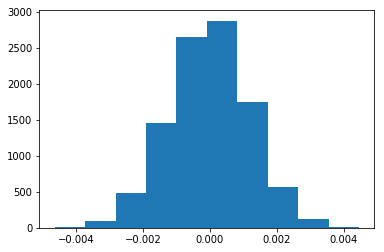

In [30]:
# Convert to numpy array
diffs = np.array(diffs)

# Plot sampling distribution
plt.hist(diffs);

Now to find the p-value lets simulate the distribution under NULL and find the probability that our observed statistic came from this distribution. 
We are creating the distribution centered at 0 and they are having same spread as our sampling distribution.

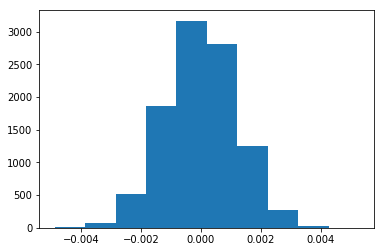

In [31]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

# Plot the null distribution
plt.hist(null_vals);

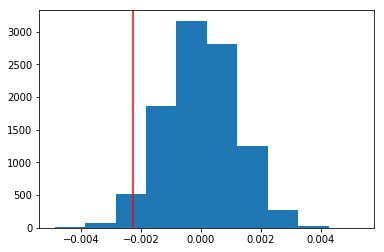

In [32]:
# Plot observed statistic with the null distibution
plt.hist(null_vals);
plt.axvline(obs_diff, c='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
new_conv - old_conv

-0.0015774213617705535

In [34]:
(diffs > (new_conv - old_conv)).mean()

0.9022

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**From the plot we can see our observed statistic falls within the NULL distribution suggesting that the difference isnt significant. 
<br> p-Value (0.9004) is greater than our type 1 error rate of 0.05.
<br> There isnt enough evidence to reject NULL hypotheses and hence the company should retain oldpage.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
import statsmodels.api as sm

old_df = df2.query("landing_page == 'old_page'")
new_df = df2.query("landing_page == 'new_page'")

convert_old = old_df.query('converted == 1').user_id.nunique() 
convert_new = new_df.query('converted == 1').user_id.nunique() 
n_old = old_df.user_id.nunique()
n_new = new_df.user_id.nunique()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [36]:
stat , p_value = sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new],alternative='smaller')

stat, p_value

(1.3102408579271012, 0.9049428161159749)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

##### https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/z-score/

**z-score (aka, a standard score) indicates how many standard deviations an element is from the mean.**
<br> **A z-score value of 1 suggests that it is 1 standard deviation away from the mean, 2 suggests 2 standard deviations awat from the mean and so on. 1 standard deviation from mean covers 68% of the total population and 2 standard deviation covers ~ 97% of population.**

<br> **A Z-Score value of 1.31 suggests that our p-value is between 1st and 2nd standard deviation of the distribution, which is significantly larger than Type 1 error value.**
<br> **Likewise our p-value is 0.9049 which strongly suggest that we should fail to reject NULL hypotheses.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since each row is either a conversion or no conversion (categorical variable), we will be using logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [39]:
df2['intercept'] = 1

log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366119
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290583
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            1
Date:                Mon, 19 Aug 2019   Pseudo R-squ.:               8.068e-06
Time:                        01:04:04   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1901
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.310      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
np.exp(results.params)

intercept    0.136863
ab_page      0.985130
dtype: float64

In [41]:
1/np.exp(results.params)

intercept    7.306593
ab_page      1.015094
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value associate with ab_page(new page) is 0.190 which makes it statistically insignificant. We are expecting to see a value less than 0.05.
<br> The Null hypothesis is Old page is better or equal to new page in conversion while Alternative Hypothesis is that the new page is better at getting a conversion. 
<br> Looking at the coefficient of ab_page, we can say for every 1 unit decrease in ab_page, we can see a conversion of 1.015 times holding everything else constant. 
This matches our findings in the previous section rejecting alternative hypotheses.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

There are other attributes in this dataset that we could dervie and use it for our regrssion testing. Some of these attributes that we can derive are Day of the week, Time of the day. Since these are derived from same column of timestamp, these explanatory variables are possibly highly correlated. This can lead to unexpected regression coefficients from the relationships and incorrect hypotheses testing results. We can identify multicollinearity between the explanatory variables  by using Scatter plots and VIFS; And remove the correlated variables from regression model.

We also need to keep in mind the effects of Change Aversion and Novelty effect when old and new users access the webage.
Adequate datapoints such as traffic to the webpage and conversions are required for significant and repeatable results.
Practical significance is also an important factor to consider(the cost of launching a new webpage vs. the gain from the increase in conversion).

**Put your answer here.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [42]:
df_c = pd.read_csv("countries.csv")

df_c.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [43]:
df_combined = df2.merge(df_c, left_on='user_id', right_on='user_id', how='inner')

df_combined.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US


In [44]:
df_combined.groupby('country')['user_id'].count()

country
CA     14499
UK     72466
US    203618
Name: user_id, dtype: int64

In [45]:
country_dummies = pd.get_dummies(df_combined['country'])
df_new = df_combined.join(country_dummies)
df_new = df_new.drop(['CA'] , axis=1)
df_new.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US,0,1


In [46]:
log_ct = sm.Logit(df_new['converted'], df_new[['intercept', 'UK','US']])
results = log_ct.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290583
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            2
Date:                Mon, 19 Aug 2019   Pseudo R-squ.:               1.520e-05
Time:                        01:04:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

In [47]:
np.exp(results.params)

intercept    0.130350
UK           1.052027
US           1.041653
dtype: float64

Based on coefficients of UK and US variables, holding everything else constant
1. We can say for every 1 unit increase in UK, we can see a conversion of 1.052 times
2. We can say for every 1 unit increase in US, we can see a conversion of 1.041 times

We can see the p-values for both UK and US are higher than .05 and hence not statistically significant.
Hence we can safely reject to fail NULL hypotheses based on country dummy variables.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [48]:
log_ct2 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page','UK','US']])
results = log_ct2.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290583
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            3
Date:                Mon, 19 Aug 2019   Pseudo R-squ.:               2.322e-05
Time:                        01:04:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1761
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.306      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.129      -0.012       0.093
==============================================================================
"""

In [49]:
np.exp(results.params)

intercept    0.131331
ab_page      0.985175
UK           1.051944
US           1.041605
dtype: float64

In [50]:
1/np.exp(results.params)

intercept    7.614333
ab_page      1.015048
UK           0.950621
US           0.960057
dtype: float64

The explanatory variables dont seem to be correlated as their coeffients dont seem to vary from the individual regression values.

Based on coefficients of UK and US variables, holding everything else constant
1. We can say for every 1 unit increase in UK, we can see a conversion of 1.052 times
2. We can say for every 1 unit increase in US, we can see a conversion of 1.041 times
3. we can say for every 1 unit decrease in ab_page, we can see a conversion of 1.015 times

We can see the p-values for all categorical variables are higher than .05 and hence not statistically significant.
Hence we can safely reject to fail NULL hypotheses.

In conclusion, implementing new page does not increase conversion. This was determined using bootstrapping sampling distribution, proportions_ztest and Logistic regression.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0